In [3]:
from   symcircuit.symbolic_solver.domains    import Circuit, ExperimentResult
from   symcircuit.symbolic_solver.solver     import Circuit_Solver, Impedance_Analyzer
from   symcircuit.demo.multiple_feedback     import Customized_Current_Mode_Multiple_Feedback_With_Limitation as TIA_CMMF
import sympy

# Manual Runs

In [2]:
circuit = TIA_CMMF.circuit
circuit.hasSolution()

True

In [3]:
circuit.impedances, circuit.impedancesToDisconnect

([Z_1, Z_2, Z_3, Z_4, Z_5, Z_6], [Z_1, Z_2, Z_3, Z_4, Z_5, Z_6])

In [4]:
for i, eq in enumerate(circuit.nodal_equations, 1):
    print(f"{i} - {eq}")

1 - Eq(-GB*Vn1/s, Vo1)
2 - Eq(-GB*Vn2/s, Vo2)
3 - Eq(Iin, (-Va + Vn1)/Z_2 + (Vn1 - Vo1)/Z_1)
4 - Eq(0, -Va/Z_4 + (Va - Vn2)/Z_5 + (-Va + Vo1)/Z_3 + (-Va + Vn1)/Z_2)
5 - Eq((Va - Vn2)/Z_5, (Vn2 - Vo2)/Z_6)


In [5]:
circuit.solve_for

[Vo1, Vo2, Va, Vn1, Vn2, Iin]

## Circuit Solver

In [6]:
solver = Circuit_Solver(circuit=circuit, _output= sympy.symbols("Vo2 0"), _input=sympy.symbols("Iin 0"), transmissionMatrixType="NA")

In [7]:
solver.impedances

[Z_1, Z_2, Z_3, Z_4, Z_5, Z_6]

In [8]:
solver.impedancesToDisconnect

[Z_1, Z_2, Z_3, Z_4, Z_5, Z_6]

In [7]:
solver.solve()

====Solving the Circuit====
--- Computing the possible impedance connections for [Z_1, Z_2, Z_3, Z_4, Z_5, Z_6] ---
--- Impedance connections stored in Circuit_Solver.impedanceConnections---
 ----------------------------
1 - Solving for (Vo2 - 0) / (Iin - 0)
2 - Intermediate Variables: [Vo1, Vo2, Va, Vn1, Vn2, Iin]
 ----------------------------
3 - solved the base transfer function (symbolic [T])
-- Single-ended input/output
processing combo index 1
processing combo index 2
processing combo index 3
processing combo index 4
processing combo index 5
processing combo index 6
=====*Circuit Solved*=====


In [8]:
solver.solutions

[{Va: Iin*(GB**2*Z_1*Z_2*Z_4*Z_5 + GB*Z_1*Z_2*Z_4*Z_5*s + GB*Z_1*Z_2*Z_4*Z_6*s - GB*Z_1*Z_3*Z_4*Z_5*s - Z_1*Z_3*Z_4*Z_5*s**2 - Z_1*Z_3*Z_4*Z_6*s**2)/(-GB**2*Z_1*Z_4*Z_5 + GB**2*Z_2*Z_3*Z_4 - GB**2*Z_2*Z_3*Z_5 - GB**2*Z_2*Z_4*Z_5 - GB**2*Z_3*Z_4*Z_5 + GB*Z_1*Z_3*Z_4*s - GB*Z_1*Z_3*Z_5*s - 2*GB*Z_1*Z_4*Z_5*s - GB*Z_1*Z_4*Z_6*s + 2*GB*Z_2*Z_3*Z_4*s - 2*GB*Z_2*Z_3*Z_5*s - GB*Z_2*Z_3*Z_6*s - 2*GB*Z_2*Z_4*Z_5*s - GB*Z_2*Z_4*Z_6*s - 2*GB*Z_3*Z_4*Z_5*s - GB*Z_3*Z_4*Z_6*s + Z_1*Z_3*Z_4*s**2 - Z_1*Z_3*Z_5*s**2 - Z_1*Z_3*Z_6*s**2 - Z_1*Z_4*Z_5*s**2 - Z_1*Z_4*Z_6*s**2 + Z_2*Z_3*Z_4*s**2 - Z_2*Z_3*Z_5*s**2 - Z_2*Z_3*Z_6*s**2 - Z_2*Z_4*Z_5*s**2 - Z_2*Z_4*Z_6*s**2 - Z_3*Z_4*Z_5*s**2 - Z_3*Z_4*Z_6*s**2),
  Vn1: Iin*(GB*Z_1*Z_2*Z_3*Z_4*s - GB*Z_1*Z_2*Z_3*Z_5*s - GB*Z_1*Z_2*Z_4*Z_5*s - GB*Z_1*Z_3*Z_4*Z_5*s + Z_1*Z_2*Z_3*Z_4*s**2 - Z_1*Z_2*Z_3*Z_5*s**2 - Z_1*Z_2*Z_3*Z_6*s**2 - Z_1*Z_2*Z_4*Z_5*s**2 - Z_1*Z_2*Z_4*Z_6*s**2 - Z_1*Z_3*Z_4*Z_5*s**2 - Z_1*Z_3*Z_4*Z_6*s**2)/(-GB**2*Z_1*Z_4*Z_5 + GB**2*Z_2*Z_3*Z_

In [9]:
symcircuit_sol = solver.baseHs
symcircuit_sol

(-GB**2*Z_1*Z_2*Z_4*Z_6 + GB*Z_1*Z_3*Z_4*Z_6*s)/(-GB**2*Z_1*Z_4*Z_5 + GB**2*Z_2*Z_3*Z_4 - GB**2*Z_2*Z_3*Z_5 - GB**2*Z_2*Z_4*Z_5 - GB**2*Z_3*Z_4*Z_5 + GB*Z_1*Z_3*Z_4*s - GB*Z_1*Z_3*Z_5*s - 2*GB*Z_1*Z_4*Z_5*s - GB*Z_1*Z_4*Z_6*s + 2*GB*Z_2*Z_3*Z_4*s - 2*GB*Z_2*Z_3*Z_5*s - GB*Z_2*Z_3*Z_6*s - 2*GB*Z_2*Z_4*Z_5*s - GB*Z_2*Z_4*Z_6*s - 2*GB*Z_3*Z_4*Z_5*s - GB*Z_3*Z_4*Z_6*s + Z_1*Z_3*Z_4*s**2 - Z_1*Z_3*Z_5*s**2 - Z_1*Z_3*Z_6*s**2 - Z_1*Z_4*Z_5*s**2 - Z_1*Z_4*Z_6*s**2 + Z_2*Z_3*Z_4*s**2 - Z_2*Z_3*Z_5*s**2 - Z_2*Z_3*Z_6*s**2 - Z_2*Z_4*Z_5*s**2 - Z_2*Z_4*Z_6*s**2 - Z_3*Z_4*Z_5*s**2 - Z_3*Z_4*Z_6*s**2)

## Impedance Analyzer

In [10]:
analysis = Impedance_Analyzer("VLSI_CMMF", circuit_solver=solver)
print(analysis.isCircuitSolved())
analysis

True


In [11]:
for block in analysis.impedance_blocks:
    print(f"{block.name} - {block.symbol} - allowed connections {block.allowedConnections}")

1 - Z_1 - allowed connections [R_1, 1/(C_1*s), R_1 + 1/(C_1*s), R_1/(C_1*R_1*s + 1)]
2 - Z_2 - allowed connections [R_2, 1/(C_2*s), R_2 + 1/(C_2*s), R_2/(C_2*R_2*s + 1)]
3 - Z_3 - allowed connections [R_3, 1/(C_3*s), R_3 + 1/(C_3*s), R_3/(C_3*R_3*s + 1)]
4 - Z_4 - allowed connections [R_4, 1/(C_4*s), R_4 + 1/(C_4*s), R_4/(C_4*R_4*s + 1)]
5 - Z_5 - allowed connections [R_5, 1/(C_5*s), R_5 + 1/(C_5*s), R_5/(C_5*R_5*s + 1)]
6 - Z_6 - allowed connections [R_6, 1/(C_6*s), R_6 + 1/(C_6*s), R_6/(C_6*R_6*s + 1)]


In [12]:
analysis.computeTFs(comboKey="Z1_Z2_Z3_Z4_Z5_Z6")

combo key = Z1_Z2_Z3_Z4_Z5_Z6


Getting the TFs (CG): 100%|██████████| 4096/4096 [07:19<00:00,  9.32combo/s]

Number of transfer functions found: 4096


In [13]:
analysis.classifier.classifyBiQuadFilters()

Computing Biquad filter parameters: 100%|██████████| 4096/4096 [05:30<00:00, 12.41filter/s]


In [14]:
classifications = analysis.classifier.summarizeFilterType()

summarizing for filters in ['AP', 'BP', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 0
BS : 0
GE : 0
HP : 0
LP : 0
X-INVALID-NUMER : 1
X-INVALID-ORDER : 4095
X-INVALID-WZ : 0
X-PolynomialError : 0


In [15]:
analysis.reportSummary("CMMF_BiQuad", "Z1_Z2_Z3_Z4_Z5_Z6")

LaTeX report generated and saved to: Runs/VLSI_CMMF/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6_summary.tex


In [16]:
analysis.compilePDF()


=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6/CMMF_BiQuad_Z1_Z2_Z3_Z4_Z5_Z6_summary.pdf
=== Compiling DONE ===



In [17]:
analysis.export("test")

Object exported to Runs/VLSI_CMMF/test_object


In [24]:
obj = analysis.classifier.clusteredByType["X-INVALID-ORDER"][23]
obj.zCombo

(R_1, R_2, R_3, 1/(C_4*s), R_5 + 1/(C_5*s), R_6)

# Loading

In [4]:
results = ExperimentResult("VLSI_CMMF_NONIDEAL")
results = results.load("Runs/VLSI_CMMF/test_object")

In [12]:
obj = results.classifier.clusteredByType["X-INVALID-ORDER"][23]
obj.zCombo

(R_1, R_2, R_3, 1/(C_4*s), R_5 + 1/(C_5*s), R_6)

In [13]:
obj.transferFunc.simplify()

C_5*GB*R_1*R_6*s*(GB*R_2 - R_3*s)/(C_4*C_5*R_3*s**4*(R_1*R_5 + R_1*R_6 + R_2*R_5 + R_2*R_6) + GB**2*R_1 + GB**2*R_2 + GB**2*R_3 + GB*s*(C_4*GB*R_2*R_3 + C_5*GB*R_1*R_5 - C_5*GB*R_2*R_3 + C_5*GB*R_2*R_5 + C_5*GB*R_3*R_5 + 2*R_1 + 2*R_2 + 2*R_3) + s**3*(C_4*C_5*GB*R_1*R_3*R_5 + 2*C_4*C_5*GB*R_2*R_3*R_5 + C_4*C_5*GB*R_2*R_3*R_6 + C_4*R_1*R_3 + C_4*R_2*R_3 - C_5*R_1*R_3 + C_5*R_1*R_5 + C_5*R_1*R_6 - C_5*R_2*R_3 + C_5*R_2*R_5 + C_5*R_2*R_6 + C_5*R_3*R_5 + C_5*R_3*R_6) + s**2*(C_4*C_5*GB**2*R_2*R_3*R_5 + C_4*GB*R_1*R_3 + 2*C_4*GB*R_2*R_3 - C_5*GB*R_1*R_3 + 2*C_5*GB*R_1*R_5 + C_5*GB*R_1*R_6 - 2*C_5*GB*R_2*R_3 + 2*C_5*GB*R_2*R_5 + C_5*GB*R_2*R_6 + 2*C_5*GB*R_3*R_5 + C_5*GB*R_3*R_6 + R_1 + R_2 + R_3))

In [15]:
sym_dict = [sym for sym in obj.transferFunc.free_symbols]
sym_dict

[R_3, s, R_1, C_5, R_6, C_4, R_5, R_2, GB]

(-80000000.0*pi**2*f**2 - 400000000000000.0*I*pi*f)/(-2.56e-7*pi**4*f**4 + 1.376*I*pi**3*f**3 + 2332000.0*pi**2*f**2 - 1320000000000.0*I*pi*f - 3.0e+17)


2025-01-22 13:57:23,609 - matplotlib.ticker - vmin 5.011872336272722 vmax 19952623.149688788
2025-01-22 13:57:23,610 - matplotlib.ticker - ticklocs array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06,
       1.e+07, 1.e+08, 1.e+09])
2025-01-22 13:57:23,617 - matplotlib.ticker - vmin 5.011872336272722 vmax 19952623.149688788
2025-01-22 13:57:23,617 - matplotlib.ticker - ticklocs array([2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06,
       2.e+07, 3.e+07, 4.e+07, 5.

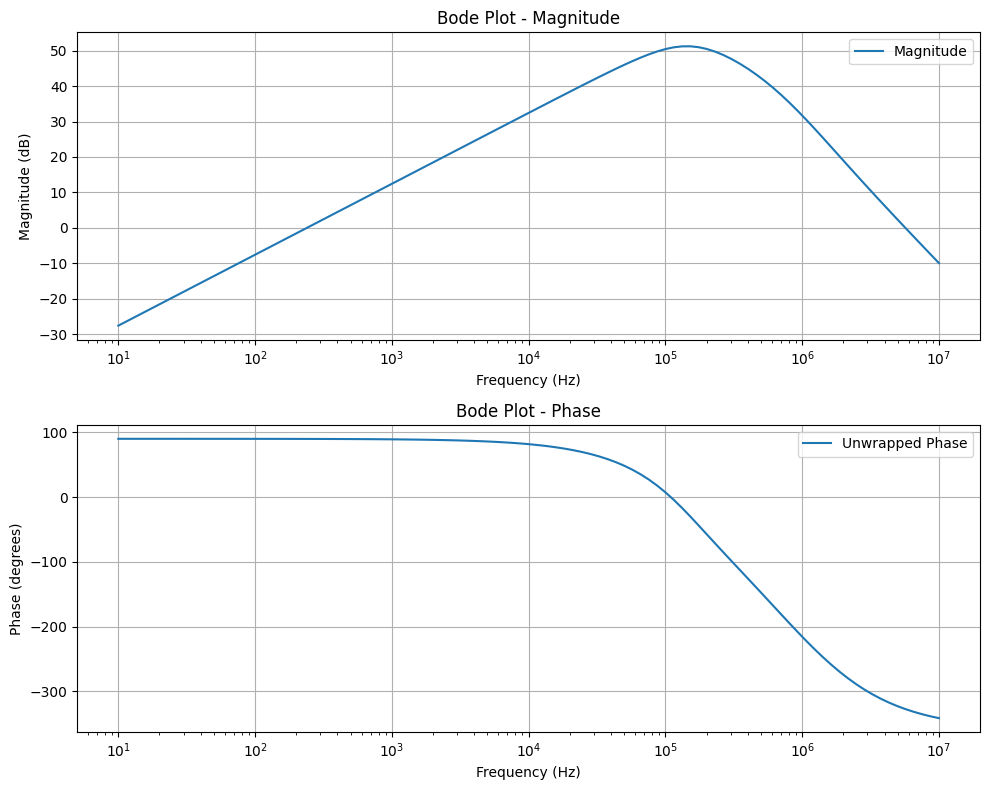

In [22]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Define the design variables
s, f = sp.symbols('s f')

# Define your transfer function (example: a simple RC low-pass filter)
H = obj.transferFunc

# Substitute design variable values (example)
R1_val = 1e3  # Ohms
R2_val = 1e3  # Ohms
R3_val = 1e3  # Ohms
R4_val = 1e3  # Ohms
R5_val = 1e3  # Ohms
R6_val = 1e3  # Ohms


C4_val = 2e-9    # Farads
C5_val = C4_val  # Farads
GB_val = 10e6

# [R_3, s, R_1, C_5, R_6, C_4, R_5, R_2, GB]
# Define the transfer function in terms of frequency
H_numeric = H.subs({
    sym_dict[0]:  R3_val, 
    sym_dict[2] : R1_val, 
    sym_dict[3] : C5_val,
    sym_dict[4] : R6_val,
    sym_dict[5] : C4_val,
    sym_dict[6] : R5_val,
    sym_dict[7] : R2_val,
    sym_dict[8] : GB_val,
    s: 2 * sp.pi * sp.I * f})

print(H_numeric)


# Compute the magnitude (in dB) and phase (in degrees)
magnitude_expr = 20 * sp.log(sp.Abs(H_numeric), 10)  # Magnitude in dB
phase_expr = sp.arg(H_numeric) * 180 / sp.pi         # Phase in degrees

# Define the frequency range
frequencies = np.logspace(1, 7, 100)  # From 10 Hz to 10 MHz

# Evaluate the magnitude and phase for each frequency
magnitude_vals = []
phase_vals = []

for freq in frequencies:
    H_val = H_numeric.subs(f, freq).evalf()  # Evaluate H at the given frequency
    mag = 20 * sp.log(sp.Abs(H_val), 10)  # Magnitude in dB
    phase = sp.arg(H_val) * 180 / sp.pi  # Phase in degrees
    magnitude_vals.append(float(mag))  # Convert to float
    phase_vals.append(float(phase))  # Convert to float


# Convert phase values to a NumPy array and unwrap
phase_vals = np.unwrap(np.deg2rad(phase_vals))  # Unwrap in radians
phase_vals = np.rad2deg(phase_vals)  # Convert back to degrees


# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot Magnitude
axs[0].semilogx(frequencies, [float(m) for m in magnitude_vals], label='Magnitude')
axs[0].set_title("Bode Plot - Magnitude")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude (dB)")
axs[0].grid(True)
axs[0].legend()

# Plot Phase
axs[1].semilogx(frequencies, phase_vals, label='Unwrapped Phase')
axs[1].set_title("Bode Plot - Phase")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Phase (degrees)")
axs[1].grid(True)
axs[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

# Automated Search

In [25]:
from   symcircuit.symbolic_solver.solver     import run_experiment

circuit = TIA_CMMF.circuit


experiment_result = run_experiment("VLSI_CMMF_Automated",
               T_type="NA",
               circuit=circuit,
               minNumOfActiveImpedances=3,
               maxNumOfActiveImpedances=5,
               impedanceKeysOverwrite= [
                   "Z1_Z2_Z3_Z4_Z5_Z6",
                   "Z2_Z3_Z4_Z5_Z6",
                   "Z1_Z3_Z4_Z5_Z6",
                   "Z1_Z2_Z3_Z5_Z6",
                   "Z3_Z4_Z5_Z6",
                   "Z2_Z3_Z5_Z6",
                   "Z1_Z3_Z5_Z6",
                   "Z3_Z5_Z6",
                   ],
               outputFrom= ["Vo2", "0"],
               inputFrom=["Iin", "0"],
               loadHistory=True
               )



!!! could not ressolve the path to the pkl file (found 0)

Solving the circuit for the first time
====Solving the Circuit====
--- Computing the possible impedance connections for [Z_1, Z_2, Z_3, Z_4, Z_5, Z_6] ---
--- Impedance connections stored in Circuit_Solver.impedanceConnections---
 ----------------------------
1 - Solving for (Vo2 - 0) / (Iin - 0)
2 - Intermediate Variables: [Vo1, Vo2, Va, Iin]
 ----------------------------
3 - solved the base transfer function (symbolic [T])
-- Single-ended input/output
processing combo index 1
processing combo index 2
processing combo index 3
processing combo index 4
processing combo index 5
processing combo index 6
=====*Circuit Solved*=====

=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results_circuit_solution.pkl - 6.641 kb ===

** Loading the circuit history
could not ressolve the path to the pkl file (found 0)
** Found 0 keys already computed
Experiment keys: ['Z1_Z2_Z3_Z4_Z5_Z6', 'Z2_Z3_Z4_Z5_Z6', 'Z1_Z3_Z4_Z5_

Getting the TFs (CG): 100%|██████████| 4096/4096 [00:46<00:00, 87.50combo/s] 


Number of transfer functions found: 4096


Computing Biquad filter parameters: 100%|██████████| 4096/4096 [00:46<00:00, 88.64filter/s] 


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 120
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 28
LP : 120
X-INVALID-NUMER : 434
X-INVALID-ORDER : 3190
X-INVALID-WZ : 204
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z4_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 2375.339 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z2_Z3_Z4_Z5_Z6 (2/8)

comb

Getting the TFs (CG): 100%|██████████| 1024/1024 [00:00<00:00, 1345.86combo/s]


Number of transfer functions found: 1024


Computing Biquad filter parameters: 100%|██████████| 1024/1024 [00:00<00:00, 2116.46filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 48
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 0
LP : 48
X-INVALID-NUMER : 48
X-INVALID-ORDER : 880
X-INVALID-WZ : 0
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z4_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 2494.734 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z1_Z3_Z4_Z5_Z6 (3/8)

combo key = Z1_Z3_Z4_Z5_Z6


Getting the TFs (CG): 100%|██████████| 1024/1024 [00:05<00:00, 200.49combo/s]


Number of transfer functions found: 1024


Computing Biquad filter parameters: 100%|██████████| 1024/1024 [00:07<00:00, 133.33filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 40
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 9
LP : 40
X-INVALID-NUMER : 135
X-INVALID-ORDER : 743
X-INVALID-WZ : 57
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z4_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 2868.341 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z1_Z2_Z3_Z5_Z6 (4/8)

combo key = Z1_Z2_Z3_Z5_Z6


Getting the TFs (CG): 100%|██████████| 1024/1024 [00:07<00:00, 145.14combo/s]


Number of transfer functions found: 1024


Computing Biquad filter parameters: 100%|██████████| 1024/1024 [00:09<00:00, 113.44filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 44
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 8
LP : 44
X-INVALID-NUMER : 149
X-INVALID-ORDER : 714
X-INVALID-WZ : 65
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z2_Z3_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 3293.374 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z3_Z4_Z5_Z6 (5/8)

combo key = Z3_Z4_Z5_Z6


Getting the TFs (CG): 100%|██████████| 256/256 [00:08<00:00, 29.51combo/s]


Number of transfer functions found: 256


Computing Biquad filter parameters: 100%|██████████| 256/256 [00:00<00:00, 1415.16filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 0
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 0
LP : 0
X-INVALID-NUMER : 0
X-INVALID-ORDER : 32
X-INVALID-WZ : 0
X-PolynomialError : 224
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z4_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 3335.757 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z2_Z3_Z5_Z6 (6/8)

combo key = Z2_Z3_Z5_Z6


Getting the TFs (CG): 100%|██████████| 256/256 [00:00<00:00, 1175.38combo/s]


Number of transfer functions found: 256


Computing Biquad filter parameters: 100%|██████████| 256/256 [00:00<00:00, 1535.24filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 12
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 0
LP : 12
X-INVALID-NUMER : 12
X-INVALID-ORDER : 220
X-INVALID-WZ : 0
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z2_Z3_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 3368.044 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z1_Z3_Z5_Z6 (7/8)

combo key = Z1_Z3_Z5_Z6


Getting the TFs (CG): 100%|██████████| 256/256 [00:00<00:00, 401.85combo/s]


Number of transfer functions found: 256


Computing Biquad filter parameters: 100%|██████████| 256/256 [00:01<00:00, 248.22filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 15
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 0
LP : 15
X-INVALID-NUMER : 32
X-INVALID-ORDER : 184
X-INVALID-WZ : 10
X-PolynomialError : 0
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z1_Z3_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 3435.062 kb ===

--> Running the VLSI_CMMF_Automated_NA Experiment for Z3_Z5_Z6 (8/8)

combo key = Z3_Z5_Z6


Getting the TFs (CG): 100%|██████████| 64/64 [00:02<00:00, 26.89combo/s]


Number of transfer functions found: 64


Computing Biquad filter parameters: 100%|██████████| 64/64 [00:00<00:00, 679.44filter/s]


summarizing for filters in ['AP', 'BP', 'BP-UNSTABLE-ZERO', 'BS', 'GE', 'HP', 'LP', 'X-INVALID-NUMER', 'X-INVALID-ORDER', 'X-INVALID-WZ', 'X-PolynomialError']
AP : 0
BP : 0
BP-UNSTABLE-ZERO : 0
BS : 0
GE : 0
HP : 0
LP : 0
X-INVALID-NUMER : 0
X-INVALID-ORDER : 8
X-INVALID-WZ : 0
X-PolynomialError : 56
LaTeX report generated and saved to: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z5_Z6_summary.tex

=== Compiling the reports to PDF ===
----** compiling Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z5_Z6_summary.tex **----
PDF generated: Runs/VLSI_CMMF_Automated_NA/VLSI_CMMF_Automated_NA_Z3_Z5_Z6/VLSI_CMMF_Automated_NA_Z3_Z5_Z6_summary.pdf
=== Compiling DONE ===


=== ExperimentResult saved successfully to Runs/VLSI_CMMF_Automated_NA/results.pkl - 3445.789 kb ===

<----> END OF EXPERIMENT <---->
Impedance Keys analyzed (count: 8): 
['Z1_Z2_Z3_Z4_Z5_Z6',
 'Z2_Z3_Z4_Z5_Z6',
 'Z1_Z3_Z4_Z5_Z6',
 'Z1_Z2_Z3_Z5_Z6

In [27]:
classifications, tf = experiment_result.get_impedance_key("Z1_Z2_Z3_Z4_Z5_Z6")
tf

Z_1*Z_2*Z_4*Z_6/(Z_1*Z_4*Z_5 - Z_2*Z_3*Z_4 + Z_2*Z_3*Z_5 + Z_2*Z_4*Z_5 + Z_3*Z_4*Z_5)

In [ ]:
type(classifications), type(classifications[-1])

In [ ]:
# df_classifications = experiment_result.flatten_classifications()
# df_classifications

In [ ]:
# df_tfs = experiment_result.flatten_tfs()
# df_tfs

In [28]:
experiment_result.to_csv()

Writting VLSI_CMMF_Automated_NA to csv files
flattened all the classifications to Runs/VLSI_CMMF_Automated_NA/classifications_.csv
flattened all the classifications to Runs/VLSI_CMMF_Automated_NA/tfs_.csv
